In [1]:
import networkx as nx
import osmnx as ox
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
ox.config(use_cache=True, log_console=True)

'0.8.2'

 #### This line of code takes as a parameter the coordinates of the Boundary Box (the geographical area on which you want to perforn the analysis) and returns a graph.


In [50]:
north=34.00004
south=33.98999
east=-6.8395
west=-6.86736
G=ox.graph_from_bbox(north, south, east,  west, network_type='all_private',simplify=True, 
                     retain_all=False, truncate_by_edge=False,name='unnamed', timeout=180, memory=None,
                     max_query_area_size=50*1000*50*1000,clean_periphery=True,infrastructure='way["highway"]', 
                     custom_filter=None)

#### Display the 5 first elements of the adjacency matrix

In [39]:
A=nx.to_pandas_adjacency(G)
A.head()


,2423951363,4680358915,1176583172,1176583174,1834146823,20966431,1772592161,411730978,1772592163,2423958564,...,4680358899,1834146798,4680358901,2719487984,411730935,4680358904,4680358905,4680358907,4680358908,4680358911
2423951363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4680358915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1176583172,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1176583174,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1834146823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### To verify the geographical coordinates of each node, we can convert the graph data into a GeoDataFrame. (Only 5 nodes were displayed instead of 380).

In [46]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
path = nx.shortest_path(G)
GDF=gdf_nodes.loc[path]
GDF.head()

,highway,osmid,x,y,geometry
2423951363,NaN,2423951363,-6.8479,33.9933,POINT (-6.8479019 33.9932838)
4680358915,NaN,4680358915,-6.85931,33.9929,POINT (-6.8593093 33.9928982)
1176583172,NaN,1176583172,-6.86235,33.9975,POINT (-6.8623542 33.997518)
1176583174,NaN,1176583174,-6.86194,33.9974,POINT (-6.8619402 33.997387)
1834146823,NaN,1834146823,-6.84641,33.9925,POINT (-6.8464133 33.9924772)


####  Visualization of the Graph using the plotting feature availabe in osmnx package

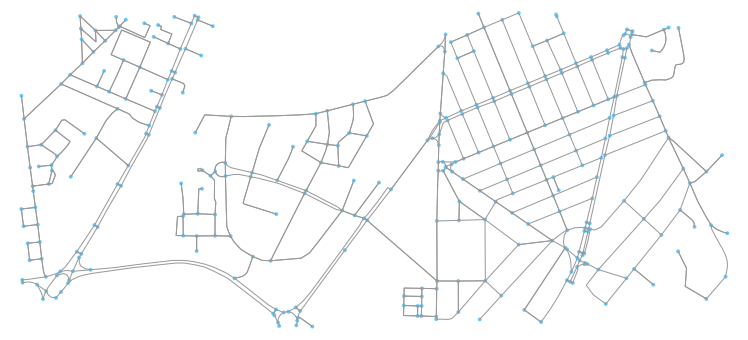

In [47]:
fig, ax = ox.plot_graph(G)

#### Select the most connected component of the graph

In [48]:
G2=ox.get_largest_component(G,True)

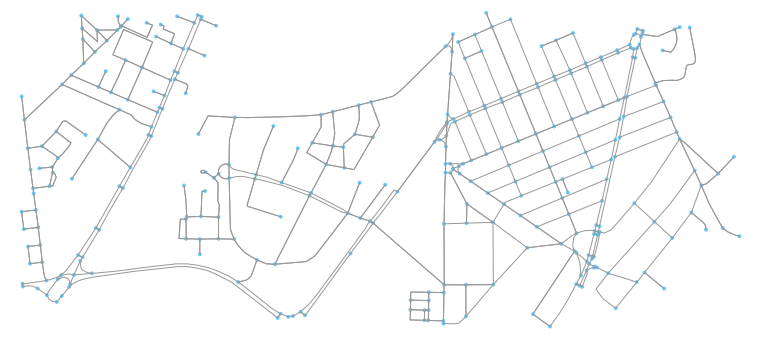

In [49]:
fig, ax = ox.plot_graph(G2)

We notice that some nodes and arcs are no longer shown in the new graph.

#### Select parallel arcs with 2 different colors

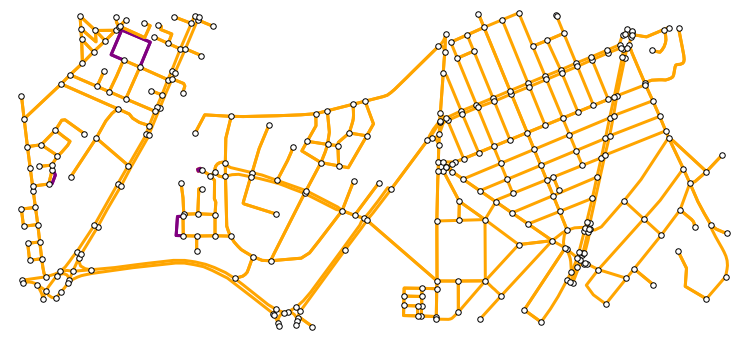

In [52]:
ec = ['orange' if key == 0 else 'purple' for u, v, key in G.edges(keys=True)]
fig, ax = ox.plot_graph(G, node_color='w', node_edgecolor='k', node_size=30, 
                           node_zorder=3, edge_color=ec, edge_linewidth=3)

#### Simplifying the created graph network

Selecting the nodes to be deleted

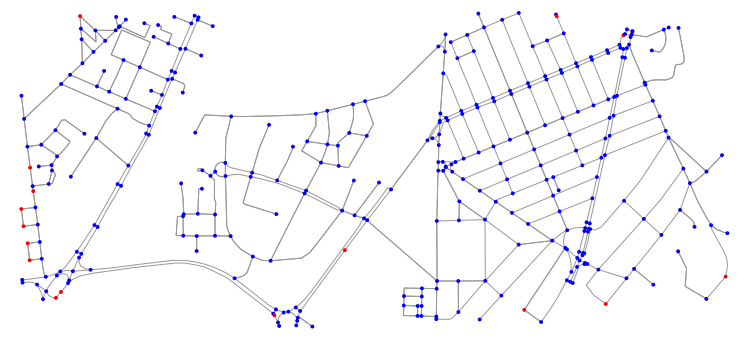

In [53]:
nc = ['b' if ox.is_endpoint(G, node) else 'r' for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_color=nc, node_zorder=3)

#### Displaying some statistics about the Network

In [4]:
ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')



{'n': 1833,
 'm': 4506,
 'k_avg': 4.916530278232406,
 'intersection_count': 1691,
 'streets_per_node_avg': 3.1238406983087836,
 'streets_per_node_counts': {0: 0, 1: 142, 2: 4, 3: 1187, 4: 485, 5: 15},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.07746863066012002,
  2: 0.002182214948172395,
  3: 0.6475722858701582,
  4: 0.2645935624659029,
  5: 0.008183306055646482},
 'edge_length_total': 436069.05,
 'edge_length_avg': 96.77519973368841,
 'street_length_total': 277879.88199999934,
 'street_length_avg': 98.60890063875065,
 'street_segments_count': 2818,
 'node_density_km': 70.58554830442687,
 'intersection_density_km': 65.11738253288915,
 'edge_density_km': 16792.238403077212,
 'street_density_km': 10700.656755995302,
 'circuity_avg': 1.046645322056353,
 'self_loop_proportion': 0.0006657789613848203,
 'clean_intersection_count': 1238,
 'clean_intersection_density_km': 47.6731635574907}

### Shortest path

#### Finding the nodes closest to the origin and destination points

In [55]:
orig_node = ox.get_nearest_node(G, (33.9928, -6.86079))
dest_node = ox.get_nearest_node(G, (33.99707, -6.85534))

#### Display of the shortest path graphically

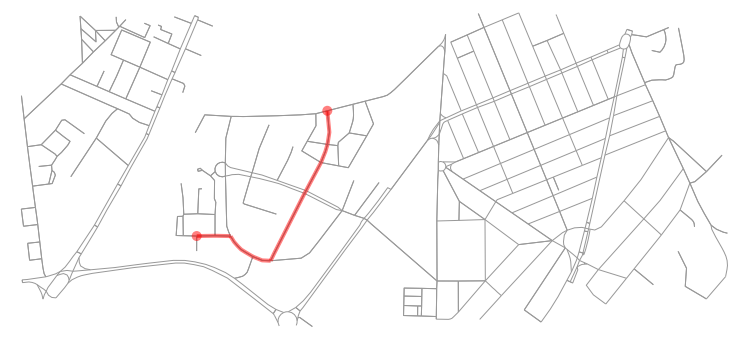

In [56]:
# find the route between these nodes then plot it
route = nx.shortest_path(G, orig_node, dest_node, weight='length')
fig, ax = ox.plot_graph_route(G, route, node_size=0)

